Dataset loaded successfully!
   Unnamed: 0                                               Text  \
0           0   ڪراچي(ويب ڊيسڪ)قومي ڪرڪيٽ ٽيم جو اڳوڻو ناليوا...   
1           1   ممبئي(ويب ڊيسڪ)انگلينڊ پاڪستان جا سڀ ٿورا وسا...   
2           2   .ٽوڪيو (ويب ڊيسڪ)ٽوڪيو اولمپڪس ۾ وڌيڪ ٽن راند...   
3           3   اسلام آباد(ويب ڊيسڪ) سڌُ سماءَ واري وفاقي وزي...   
4           4   \nڪراچي(ويب ڊيسڪ) ڪشمير پريميئر ليگ (ڪي پي اي...   

                           link  \
0  https://awamiawaz.pk/752736/   
1  https://awamiawaz.pk/752734/   
2  https://awamiawaz.pk/752357/   
3  https://awamiawaz.pk/752332/   
4  https://awamiawaz.pk/752284/   

                                               title   Label  
0  \n\t\t\t\tشاهد آفريدي ڪي پي ايل ۾ جوهر ڏيکارڻ ...  sports  
1  \n\t\t\t\tانگلينڊ پاڪستان جا سڀ ٿورا وساري ڇڏي...  sports  
2  \n\t\t\t\tٽوڪيو اولمپڪس مان پاڪستان جي وڌيڪ ٽن...  sports  
3  \n\t\t\t\tڀارت راند کي سياست ۾ آڻي پنهنجو خراب...  sports  
4  \n\t\t\t\tڪشمير پريميئر ليگ جي شي

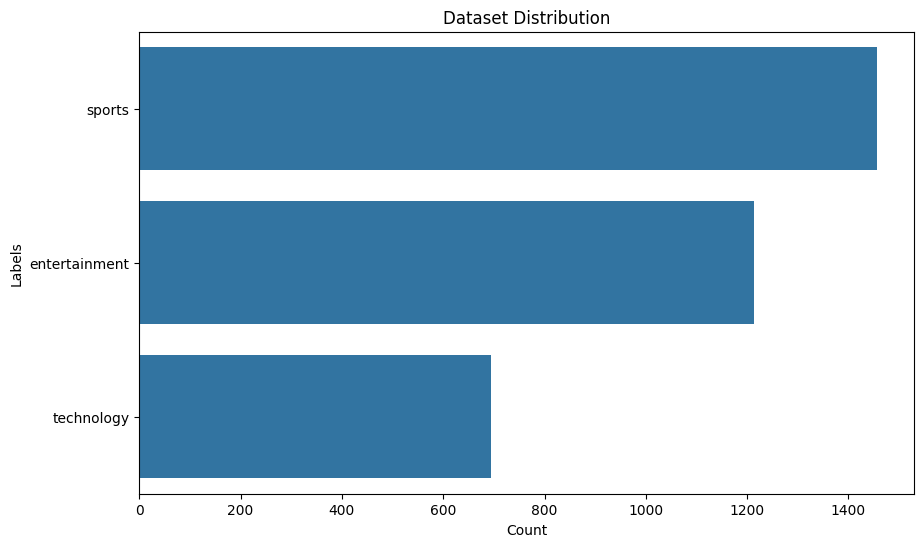

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.3846 - loss: 1.0811 - val_accuracy: 0.4318 - val_loss: 1.0295
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.5151 - loss: 0.9567 - val_accuracy: 0.6869 - val_loss: 0.6867
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.7659 - loss: 0.5507 - val_accuracy: 0.6825 - val_loss: 0.6210
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7713 - loss: 0.6235 - val_accuracy: 0.6855 - val_loss: 0.7301
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9228 - loss: 0.2179 - val_accuracy: 0.6484 - val_loss: 1.0117
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9350 - loss: 0.1847 - val_accuracy: 0.6706 - val_loss: 1.0105
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9709 - loss: 0.0988 - val_accuracy: 0.6469 - val_loss: 1.1754
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9752 - loss: 0.0776 - val_accuracy: 0.6647 - 

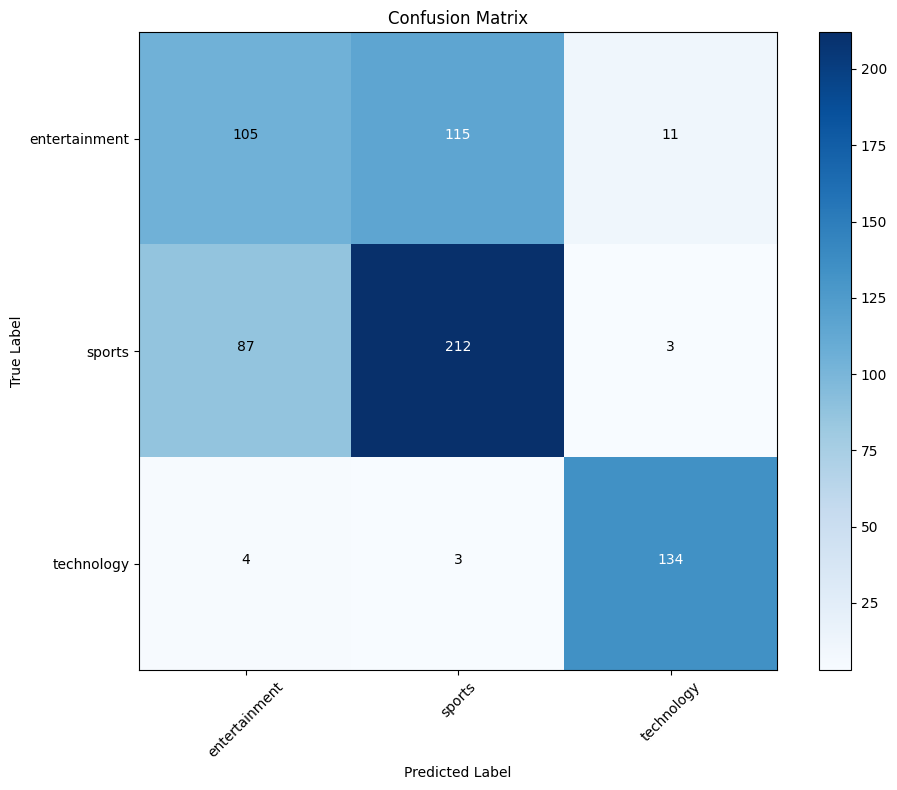

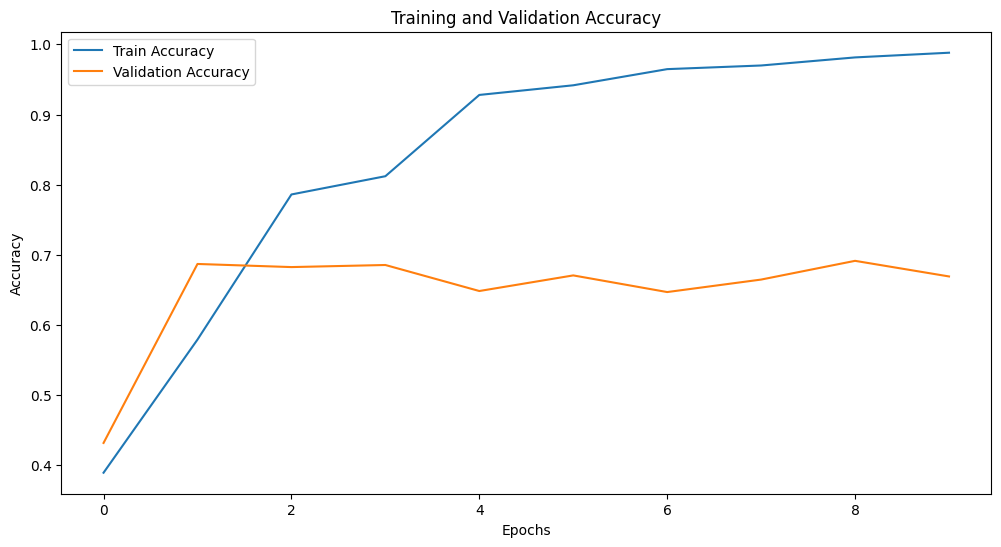

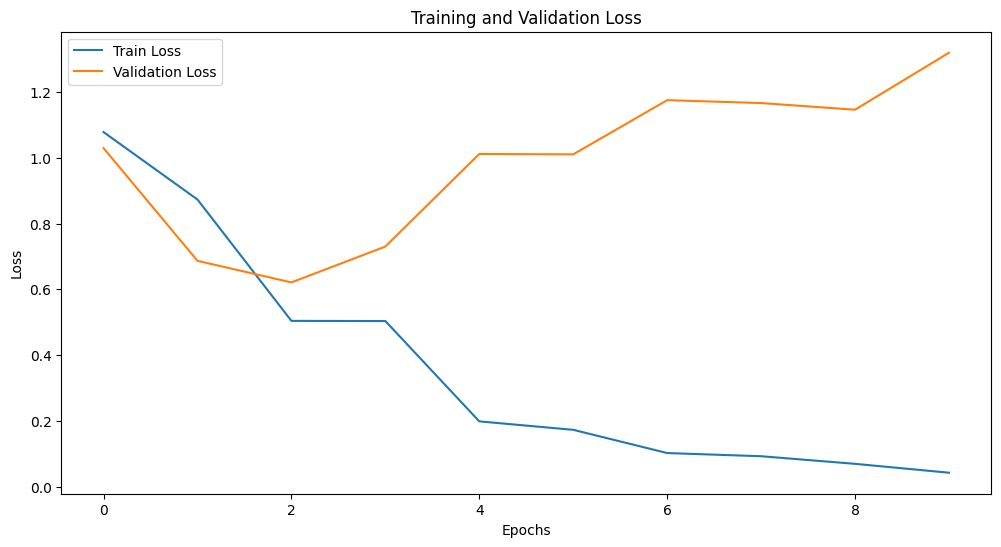

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the Sindhi dataset from the GitHub link
data_url = "https://raw.githubusercontent.com/rajavavek/SindMT/main/Articles%20Dataset.csv"
data = pd.read_csv(data_url)

# Adjust column names for consistency
data.rename(columns={"article": "Text", "genre": "Label"}, inplace=True)

# Display dataset info
print("Dataset loaded successfully!")
print(data.head())
print(data.info())

# Dataset distribution bar chart
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Label'], order=data['Label'].value_counts().index)
plt.title('Dataset Distribution')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

# Preprocess text data
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"[\u200c\u200b]+", " ", text)  # Remove zero-width characters
    text = re.sub(r"[^\u0620-\u064A\u0660-\u0669\s]", "", text)  # Keep Sindhi characters and digits
    return text

# Apply preprocessing
data['Processed_Text'] = data['Text'].apply(preprocess_text)

# Encode labels
label_encoder = LabelEncoder()
data['Label_Encoded'] = label_encoder.fit_transform(data['Label'])

# Tokenize and pad sequences
max_vocab_size = 5000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(data['Processed_Text'])
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(data['Processed_Text'])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, data['Label_Encoded'], test_size=0.2, random_state=42
)

# RNN model architecture
embedding_dim = 128

model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    SimpleRNN(128, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of output classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(report)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

cm = confusion_matrix(y_test, y_pred_classes)
plot_confusion_matrix(cm, classes=label_encoder.classes_)

# Plot training accuracy and loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
